In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re 

# Reported Model Results

In [2]:
#from Survay
Accuracy_data = pd.read_csv('../5_extractMetricsFromFullText/Normalized_Complete_Table_4.csv')
values_to_drop = ['MMI', 'SFEW 2.0', 'TFD']
Accuracy_data = Accuracy_data[~Accuracy_data['Datasets'].isin(values_to_drop)]
Accuracy_data.shape

(21, 9)

In [3]:
Accuracy_data['Accuracy'] = Accuracy_data['Performance (%)'].str.extract(r'(\d+\.?\d*)\)?\s*$')

# Convert extracted accuracy to numeric
Accuracy_data['Accuracy'] = pd.to_numeric(Accuracy_data['Accuracy'], errors='coerce')

Accuracy_data.head()

,Datasets,Method,Network Type,Network Size,Pre-processing,Data Selection,Data Group,Additional Classifier,Performance (%),Accuracy
0,CK+,Ouellet 14 [110],CNN (AlexNet),-,-,V&J,the last frame,LOSO,SVM 7 classes†: (94.4),94.40
1,CK+,Li et al. 15 [86],RBM,4,-,V&J,-,IN,6 classes: 96.8,96.80
2,CK+,Liu et al. 14 [13],DBN CN,6,2m,-,-,8 folds,AdaBoost 6 classes: 96.7,96.70
3,CK+,Liu et al. 13 [137],"CNN, RBM CN",5,-,V&J,-,10 folds,SVM 8 classes: 92.05 (87.67),87.67
4,CK+,Liu et al. 15 [138],"CNN, RBM CN",5,-,V&J,-,10 folds,SVM 7 classes‡: 93.70,93.70


In [4]:
fer_datasets_LONG = {
    "Extended Cohn-Kanade": "CK+",
    "Facial Expression Recognition 2013": "FER2013",
    "Japanese Female Facial Expression": "JAFFE",
    "Affective Faces Database": "AffectNet"
}


In [5]:
Accuracy_data.columns

Index(['Datasets', 'Method', 'Network Type', 'Network Size', 'Pre-processing',
       'Data Selection', 'Data Group', 'Additional Classifier',
       'Performance (%)', 'Accuracy'],
      dtype='object')

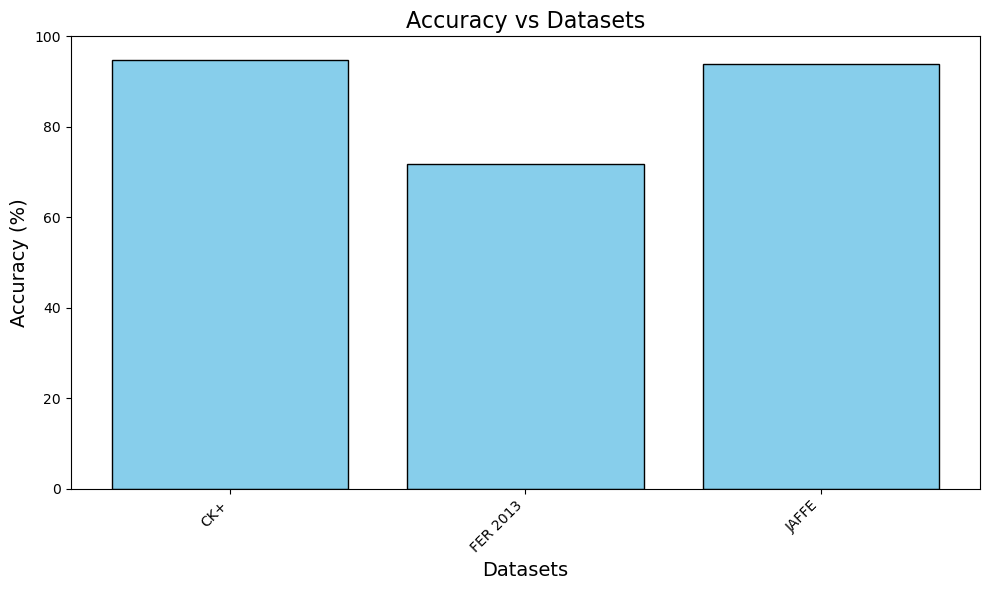

In [6]:
# Ensure 'Accuracy' is numeric by cleaning and converting the column
# If values are concatenated, split them, extract valid numbers, and compute means
def clean_accuracy(val):
    if isinstance(val, str):
        # Split concatenated numbers and keep only valid numeric values
        numbers = [float(x) for x in val.split() if x.replace('.', '', 1).isdigit()]
        return numbers
    elif isinstance(val, (int, float)):
        return [val]
    return []

# Apply the cleaning function to extract valid numbers
Accuracy_data['Accuracy_Cleaned'] = Accuracy_data['Accuracy'].apply(clean_accuracy)

# Flatten the cleaned accuracy to its first value (or average if multiple exist)
Accuracy_data['Accuracy_Cleaned'] = Accuracy_data['Accuracy_Cleaned'].apply(
    lambda x: sum(x) / len(x) if len(x) > 0 else None
)

# Ensure the 'Accuracy_Cleaned' column is numeric
Accuracy_data['Accuracy_Cleaned'] = pd.to_numeric(Accuracy_data['Accuracy_Cleaned'], errors='coerce')

# Group data by Datasets and calculate mean accuracy
grouped_data = Accuracy_data.groupby('Datasets')['Accuracy_Cleaned'].mean().reset_index()

# Plot the cleaned Accuracy vs Datasets
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Datasets'], grouped_data['Accuracy_Cleaned'], color='skyblue', edgecolor='black')
plt.title("Accuracy vs Datasets", fontsize=16)
plt.xlabel("Datasets", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# AffectNET accuracy is missing, can be done by reading 16 links below

In [7]:
Scraped_data = pd.read_csv('../5_extractMetricsFromFullText/full_text_with_metrics.csv')
#pd.set_option('display.max_colwidth', None)  # Don't truncate column contents
filtered_rows = Scraped_data[Scraped_data['Detected_Dataset'] == "Affective Faces Database"]
#print(len(filtered_rows))
filtered_rows['URL']

5           https://ieeexplore.ieee.org/document/5975141
7      https://www.sciencedirect.com/science/article/...
8      https://www.sciencedirect.com/science/article/...
23         https://ieeexplore.ieee.org/document/6998925/
24          https://ieeexplore.ieee.org/document/7451244
25     https://www.sciencedirect.com/science/article/...
41     https://www.sciencedirect.com/science/article/...
47          https://ieeexplore.ieee.org/document/5674019
73          https://ieeexplore.ieee.org/document/8528894
74          https://ieeexplore.ieee.org/document/8734943
81          https://ieeexplore.ieee.org/document/6131215
84          https://ieeexplore.ieee.org/document/8227443
86          https://ieeexplore.ieee.org/document/7956190
96     https://www.sciencedirect.com/science/article/...
109                     https://arxiv.org/abs/1512.00932
114                     https://arxiv.org/abs/1905.07039
Name: URL, dtype: object

# Scraped Data Eval

In [8]:
Scraped_data = pd.read_csv('../5_extractMetricsFromFullText/full_text_with_metrics.csv')
Scraped_data = Scraped_data.drop(['Unnamed: 0', 'ID',  'Metric_Context', 'f1 score', 'accuracy', 'precision',
       'recall', 'auc', 'mean squared error', 'r2 score', 'mae'], axis=1)
Scraped_data.head()

,Title,Authors,Year,Cited By,Detected_Dataset,Detected_Topic,Abstract,Journal,URL,Full_Text
0,3D facial expression recognition based on auto...,"['H Tang', 'TS Huang']",2008,205,Binghamton University 3D Facial Expression,"classification, classifier, facial expression ...",facial expression recognition from 3D facial s...,… on computer vision and pattern recognition …,https://ieeexplore.ieee.org/document/4563052,3D Facial Expression Recognition Based on Auto...
1,3D facial expression recognition based on prim...,"['J Wang', 'L Yin', 'X Wei', 'Y Sun']",2006,440,Binghamton University 3D Facial Expression,facial expression recognition,expressions using 3D facial expression range d...,… Vision and Pattern Recognition …,https://ieeexplore.ieee.org/document/1640921,3D Facial Expression Recognition Based on Prim...
2,A deep learning perspective on the origin of f...,"['R Breuer', 'R Kimmel']",2017,140,"Acted Facial Expressions In The Wild, Extended...","CNN, FER, deep learning, machine learning",We verify our findings on the Extended Cohn-Ka...,arXiv preprint arXiv:1705.01842,https://arxiv.org/abs/1705.01842,"BREUER,KIMMEL:ADEEPLEARNINGPERSPECTIVEONFACIAL..."
3,A deeper look at facial expression dataset bias,"['S Li', 'W Deng']",2020,127,"Affective Faces Database, MMI Facial Expression","FER, classification, classifier",As the skew class distribution across domains ...,IEEE Transactions on Affective Computing,https://arxiv.org/abs/1904.11150,1\nA Deeper Look at Facial Expression Dataset ...
4,A high-resolution spontaneous 3d dynamic facia...,"['X Zhang', 'L Yin', 'JF Cohn', 'S Canavan']",2013,920,Binghamton University 3D Facial Expression,"classification, classifier, deep learning, fac...",3D video database of spontaneous facial expres...,… gesture recognition …,https://www.sciencedirect.com/science/article/...,## Title: BP4D-Spontaneous: a high-resolution ...


In [12]:
Scraped_data.shape

(115, 10)